## Alucar - > Analisando As Vendas

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt 

In [2]:
alucar = pd.read_csv('alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar.shape

(24, 2)

In [4]:
alucar.isna().sum().sum()

0

In [5]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [6]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

<AxesSubplot:xlabel='mes', ylabel='vendas'>

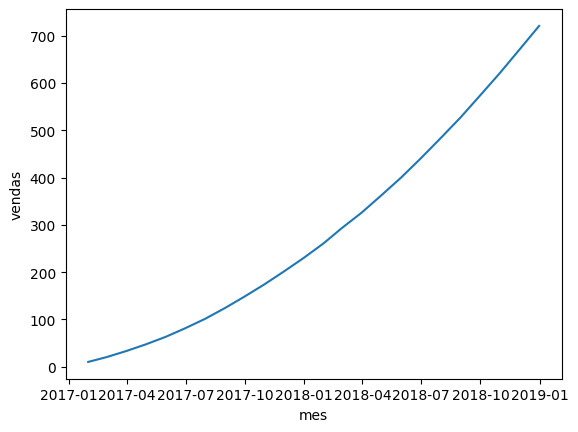

In [7]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

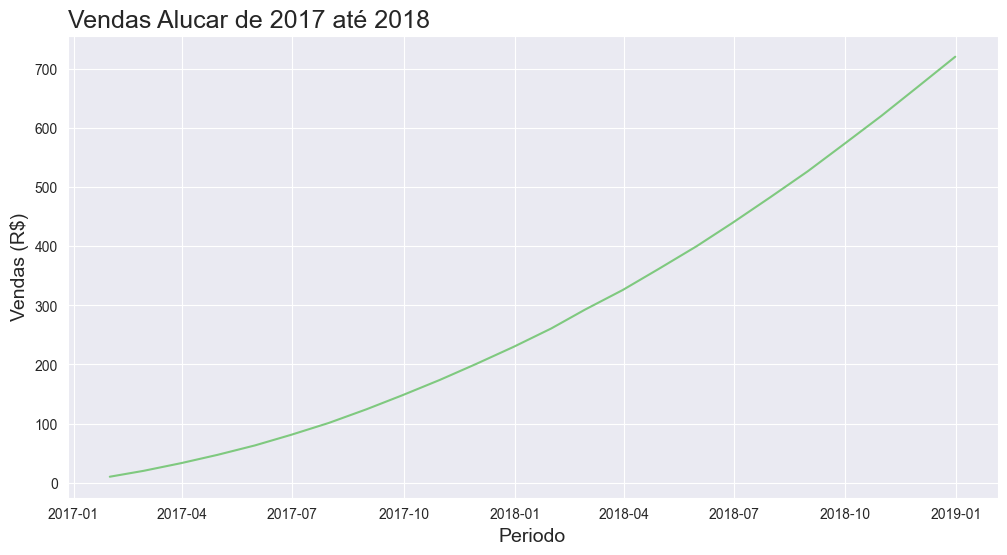

In [8]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 até 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Periodo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

In [9]:
alucar['Aumento'] = alucar['vendas'].diff()
alucar['Aumento'] = alucar['Aumento'].fillna(0)
alucar.rename(columns = {'mes': 'Mes', 'vendas': 'Vendas'}, inplace = True) 
alucar.head()

,Mes,Vendas,Aumento
0,2017-01-31,10,0.0
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


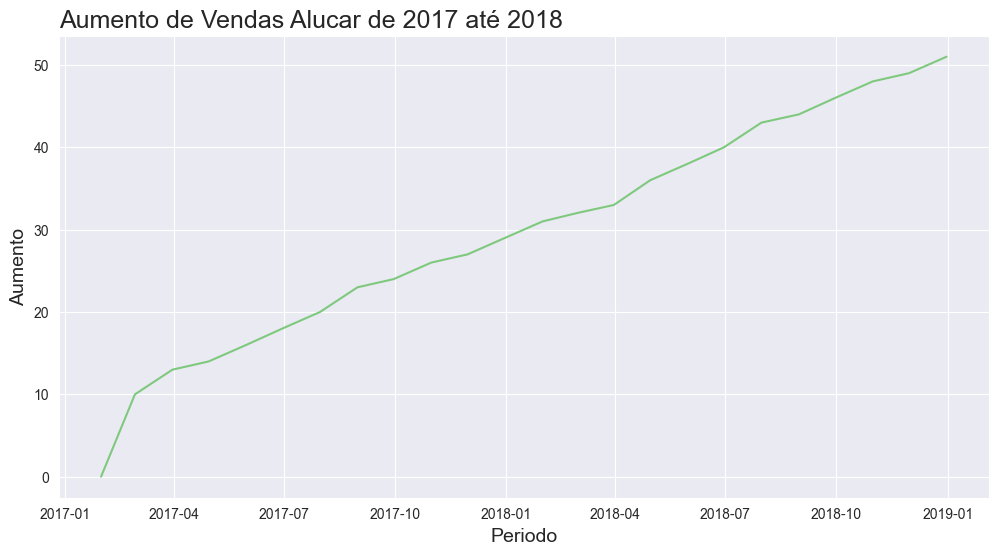

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'Mes', y = 'Aumento', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento de Vendas Alucar de 2017 até 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Periodo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

In [11]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

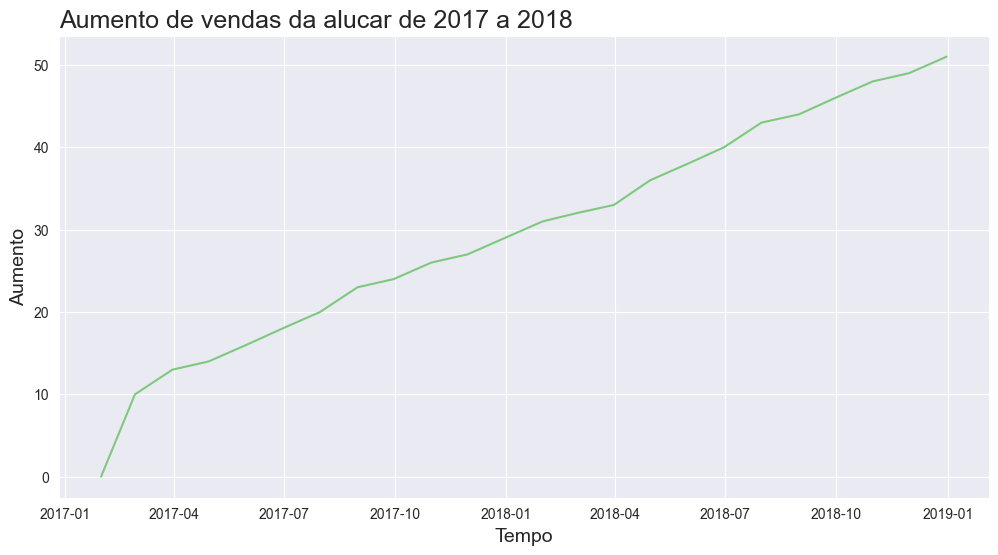

In [12]:
plotar('Aumento de vendas da alucar de 2017 a 2018', 
    'Tempo', 'Aumento', 'Mes','Aumento', alucar)

In [13]:
alucar['Aceleracao'] = alucar['Aumento'].diff()
alucar['Aceleracao'] = alucar['Aceleracao'].fillna(0)
alucar.head()

,Mes,Vendas,Aumento,Aceleracao
0,2017-01-31,10,0.0,0.0
1,2017-02-28,20,10.0,10.0
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


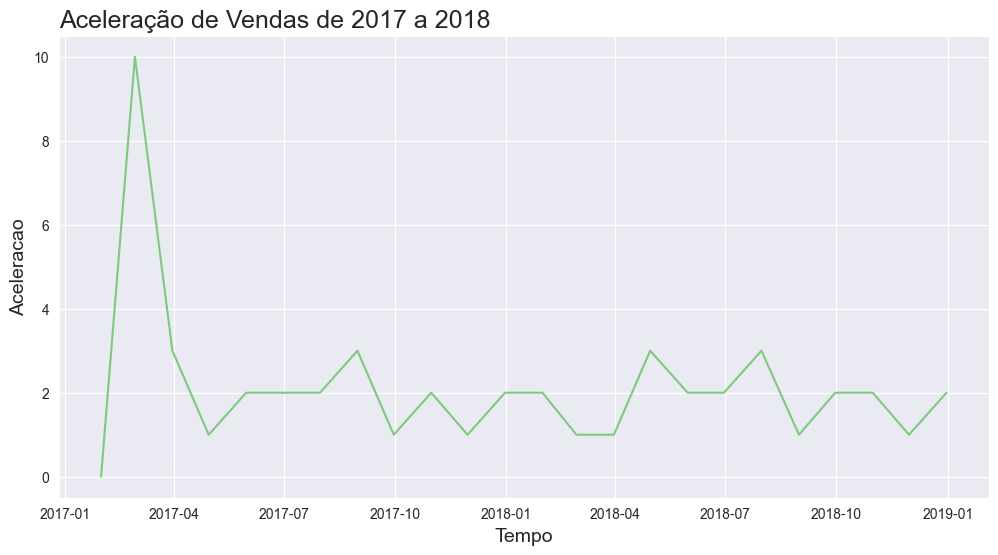

In [14]:
plotar('Aceleração de Vendas de 2017 a 2018', 'Tempo', 'Aceleracao', 'Mes',
    'Aceleracao', alucar)

<AxesSubplot:xlabel='Mes', ylabel='Aceleracao'>

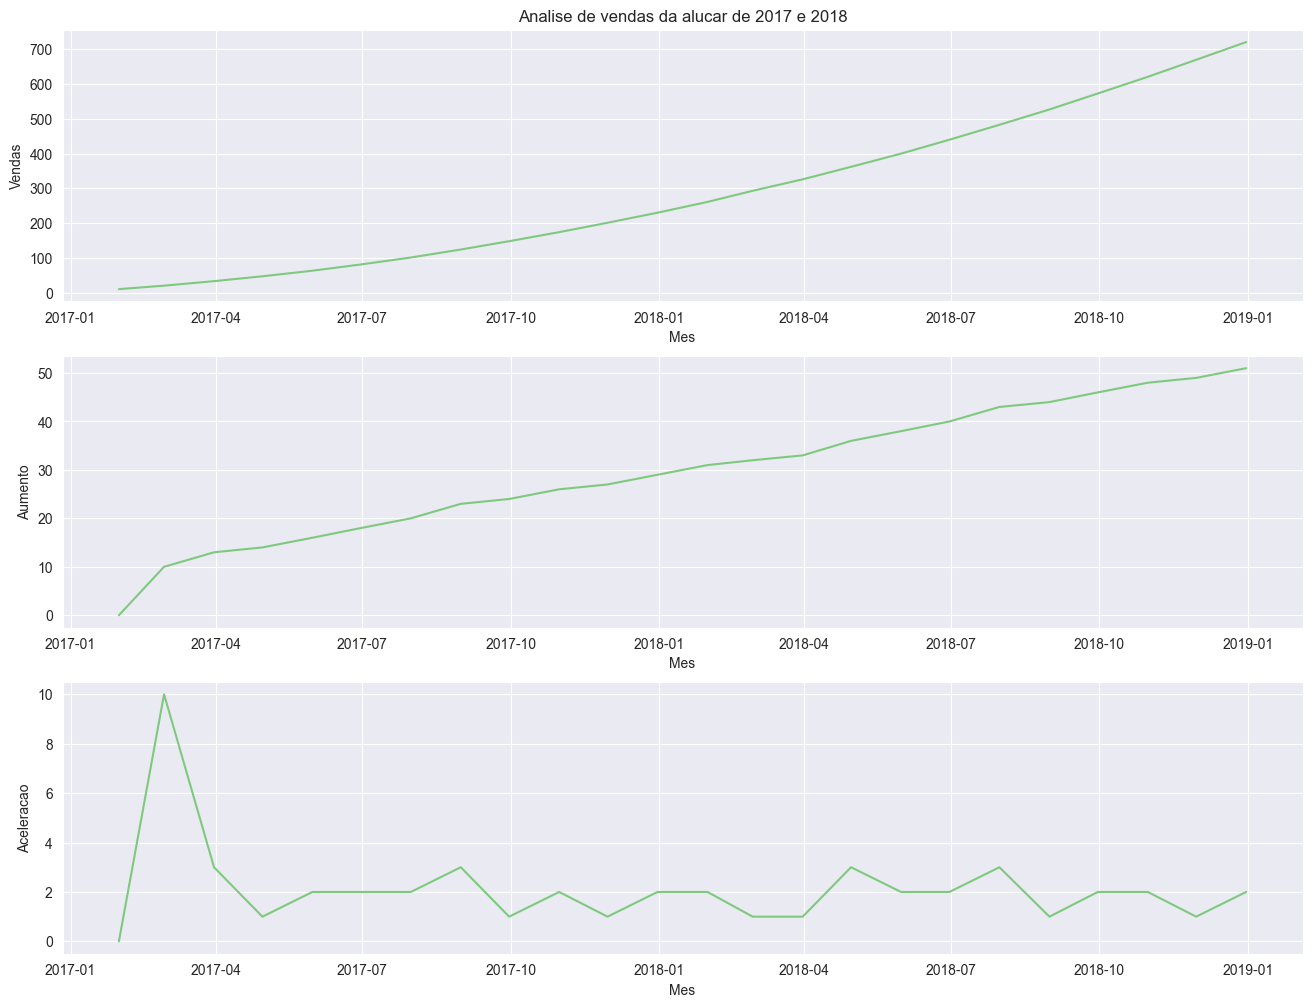

In [15]:
plt.figure(figsize = (16, 12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise de vendas da alucar de 2017 e 2018')
sns.lineplot(x = 'Mes', y = 'Vendas', data = alucar)
ax = plt.subplot(3,1,2)
sns.lineplot(x = 'Mes', y = 'Aumento', data = alucar)
ax = plt.subplot(3,1,3)
sns.lineplot(x = 'Mes', y = 'Aceleracao', data = alucar)

In [16]:
def plot_de_comparacao(titulo, x, y1, y2, y3, dataset):
    plt.figure(figsize = (16, 12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    ax = plt.subplot(3,1,2)
    sns.lineplot(x = x, y = y2, data = dataset)
    ax = plt.subplot(3,1,3)
    sns.lineplot(x = x, y = y3, data = dataset)

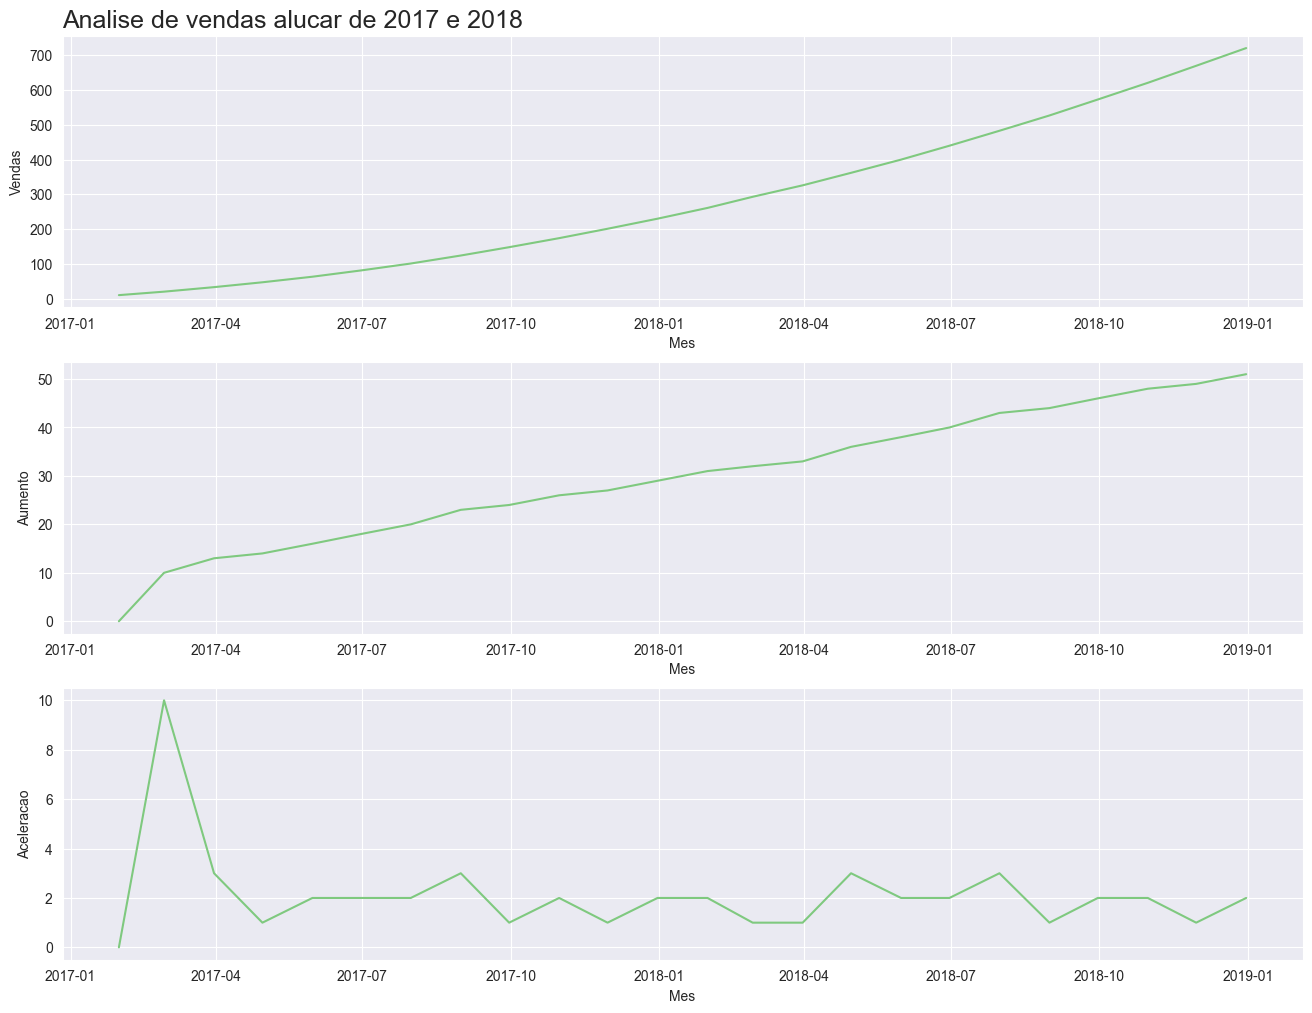

In [17]:
plot_de_comparacao('Analise de vendas alucar de 2017 e 2018',
    'Mes', 'Vendas', 'Aumento', 'Aceleracao', alucar)

In [18]:
from pandas.plotting import autocorrelation_plot

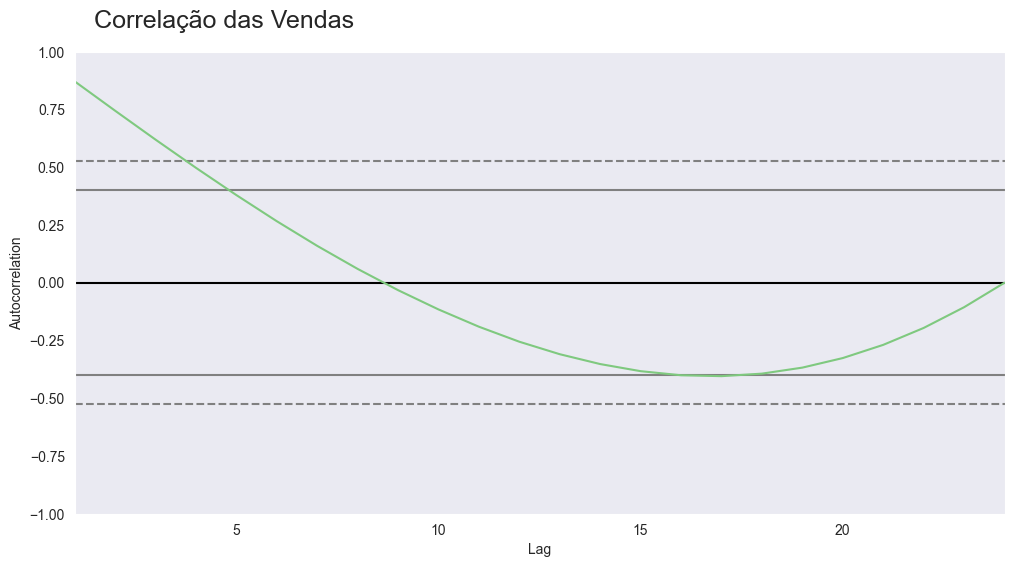

In [19]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x = 0.25, y = 0.95)
autocorrelation_plot(alucar.Vendas)
ax = ax

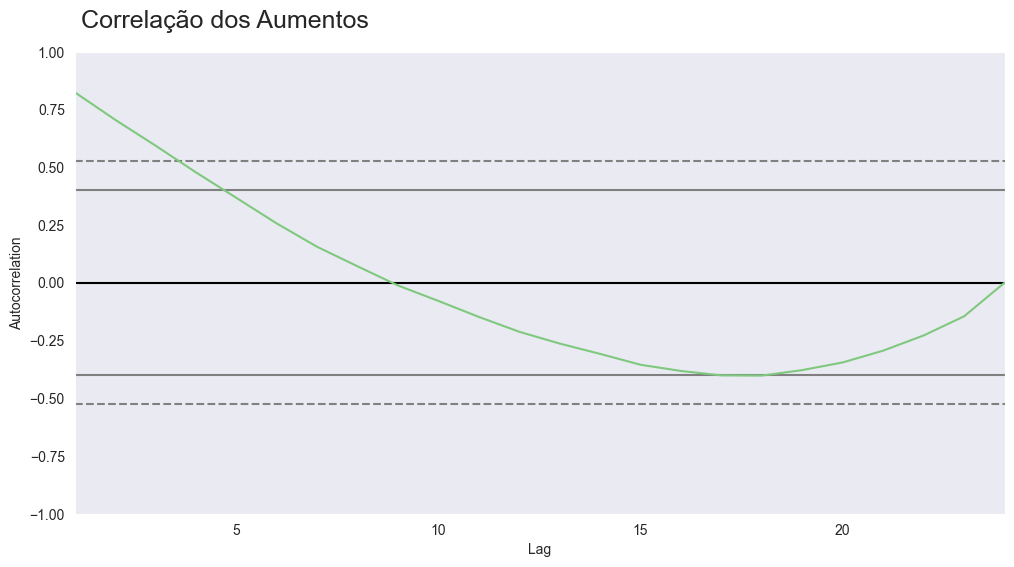

In [20]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação dos Aumentos', fontsize = 18, x = 0.25, y = 0.95)
autocorrelation_plot(alucar.Aumento)
ax = ax

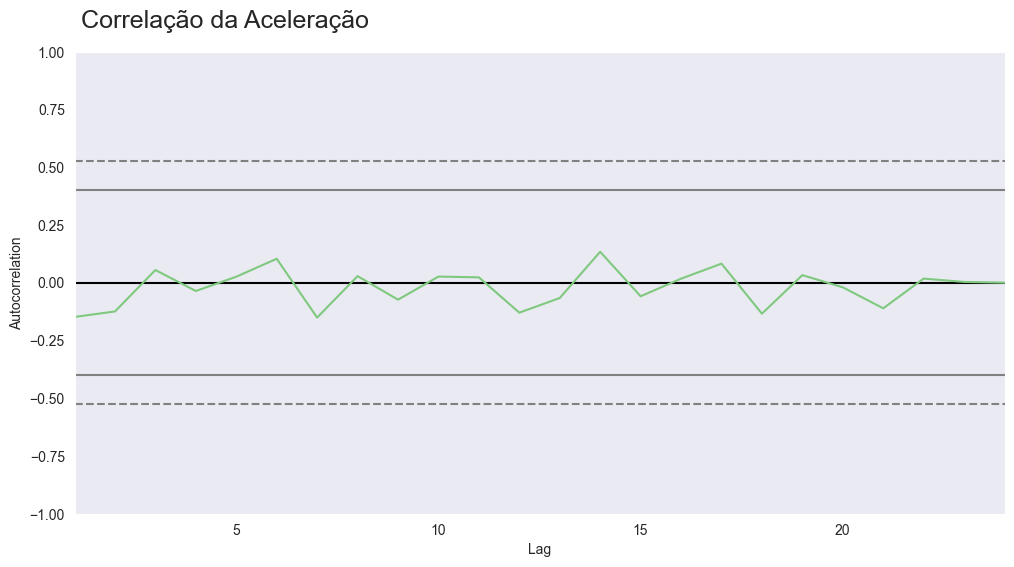

In [21]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da Aceleração', fontsize = 18, x = 0.25, y = 0.95)
autocorrelation_plot(alucar.Aceleracao)
ax = ax

## Alucar --> Analisando Assinates Newsletter

In [22]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.rename(columns = {'mes': 'Mes', 'assinantes': 'Assinantes'}, inplace = True)
assinantes.head() 

,Mes,Assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [23]:
assinantes.shape

(24, 2)

In [24]:
assinantes.isna().sum().sum()

0

In [25]:
assinantes.dtypes

Mes           object
Assinantes     int64
dtype: object

In [26]:
assinantes['Aumento'] = assinantes.Assinantes.diff()
assinantes.Aumento = assinantes.Aumento.fillna(0)
assinantes['Aceleracao'] = assinantes.Aumento.diff()
assinantes.Aceleracao = assinantes.Aceleracao.fillna(0)
assinantes.head()

,Mes,Assinantes,Aumento,Aceleracao
0,2017-01-31,0,0.0,0.0
1,2017-02-28,10,10.0,10.0
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


In [27]:
assinantes['Mes'] = pd.to_datetime(alucar['Mes'])
assinantes.dtypes

Mes           datetime64[ns]
Assinantes             int64
Aumento              float64
Aceleracao           float64
dtype: object

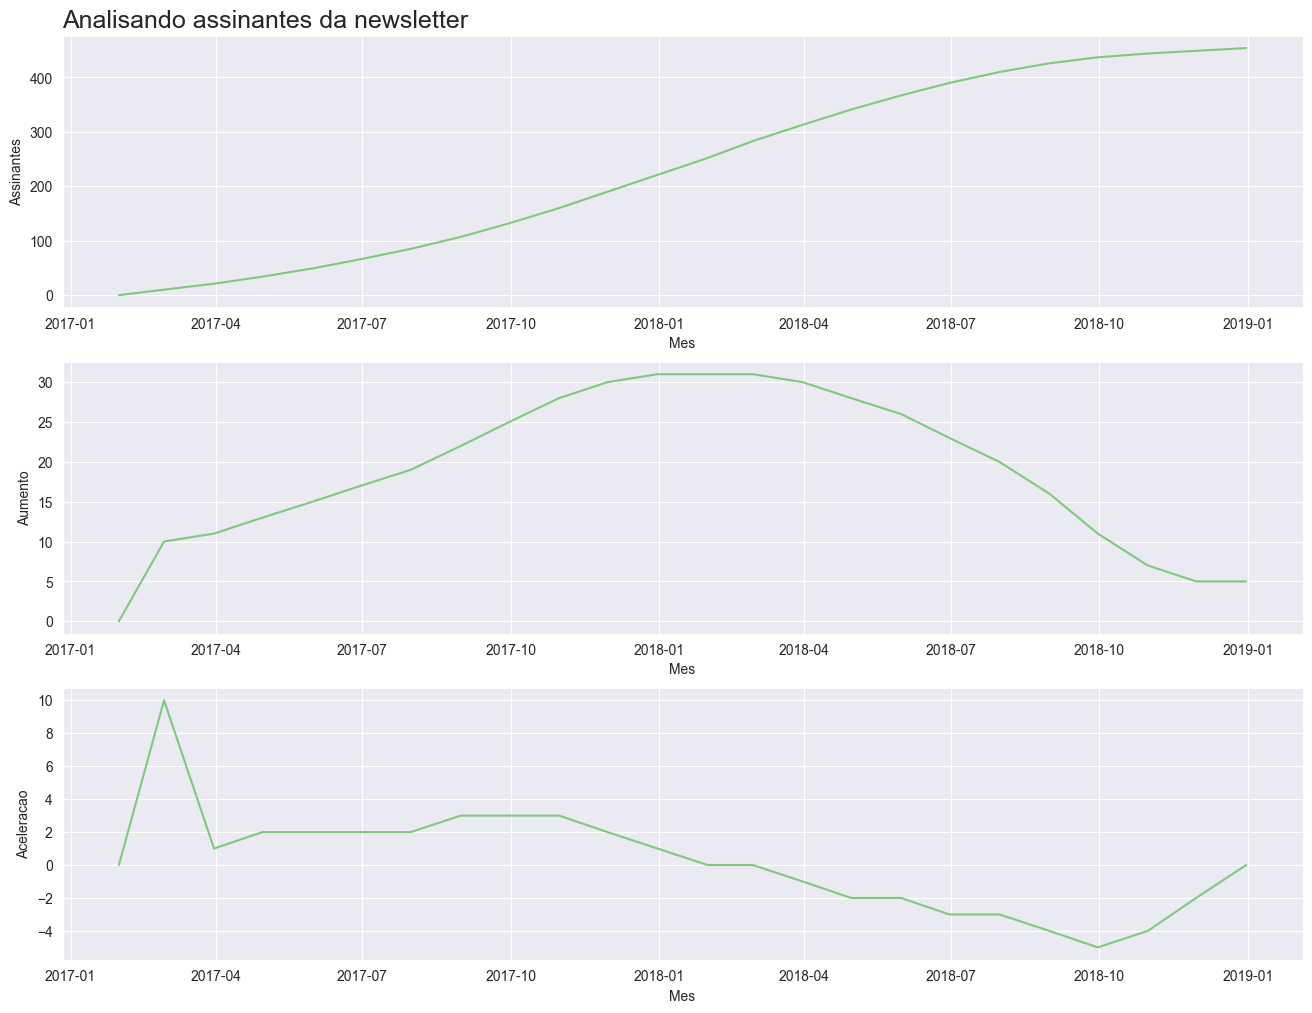

In [28]:
plot_de_comparacao( 'Analisando assinantes da newsletter',
     'Mes', 'Assinantes', 'Aumento', 'Aceleracao', assinantes)

## Chocolura --> Analisando as Vendas

In [29]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.rename(columns = {'mes': 'Mes', 'vendas': 'Vendas'}, inplace = True)
chocolura.head()

,Mes,Vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [30]:
chocolura.dtypes

Mes       object
Vendas     int64
dtype: object

In [31]:
chocolura.Mes = pd.to_datetime(chocolura.Mes)
chocolura.dtypes

Mes       datetime64[ns]
Vendas             int64
dtype: object

In [32]:
chocolura.isna().sum().sum()

0

In [33]:
chocolura['Aumento'] = chocolura.Vendas.diff()
chocolura.Aumento = chocolura.Aumento.fillna(0)
chocolura['Aceleracao'] = chocolura.Aumento.diff()
chocolura.Aceleracao = chocolura.Aceleracao.fillna(0)
chocolura.head()

,Mes,Vendas,Aumento,Aceleracao
0,2017-01-01,210,0.0,0.0
1,2017-02-01,185,-25.0,-25.0
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


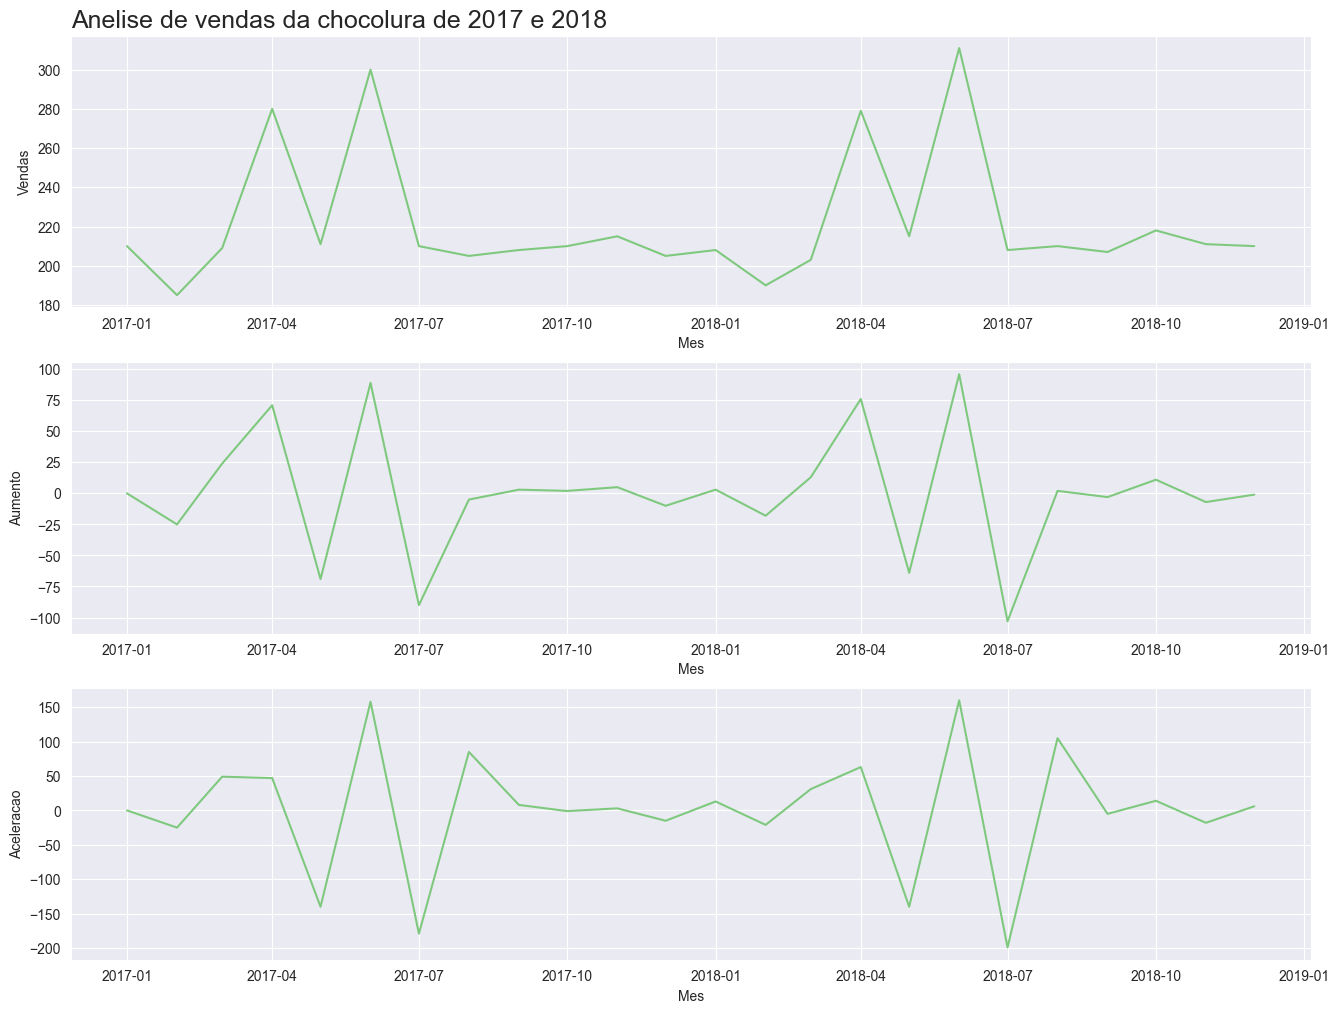

In [34]:
plot_de_comparacao('Anelise de vendas da chocolura de 2017 e 2018', 'Mes',
    'Vendas', 'Aumento', 'Aceleracao', chocolura)

## Chocolura vendas diarias de outubro e novembro

In [35]:
vendas_diarias = pd.read_csv('vendas_por_dia.csv')
vendas_diarias.rename(columns = {'dia': 'Dia', 'vendas': 'Vendas'}, inplace = True)
vendas_diarias.head()


,Dia,Vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [36]:
vendas_diarias.shape

(61, 2)

In [37]:
vendas_diarias.isna().sum().sum()

0

In [38]:
vendas_diarias.dtypes

Dia       object
Vendas     int64
dtype: object

In [39]:
vendas_diarias.Dia = pd.to_datetime(vendas_diarias.Dia)
vendas_diarias.dtypes

Dia       datetime64[ns]
Vendas             int64
dtype: object

In [40]:
vendas_diarias['Aumento'] = vendas_diarias.Vendas.diff()
vendas_diarias.Aumento = vendas_diarias.Aumento.fillna(0)
vendas_diarias['Aceleracao'] = vendas_diarias.Aumento.diff()
vendas_diarias.Aceleracao = vendas_diarias.Aceleracao.fillna(0)
vendas_diarias.head()

,Dia,Vendas,Aumento,Aceleracao
0,2018-10-01,50,0.0,0.0
1,2018-10-02,48,-2.0,-2.0
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


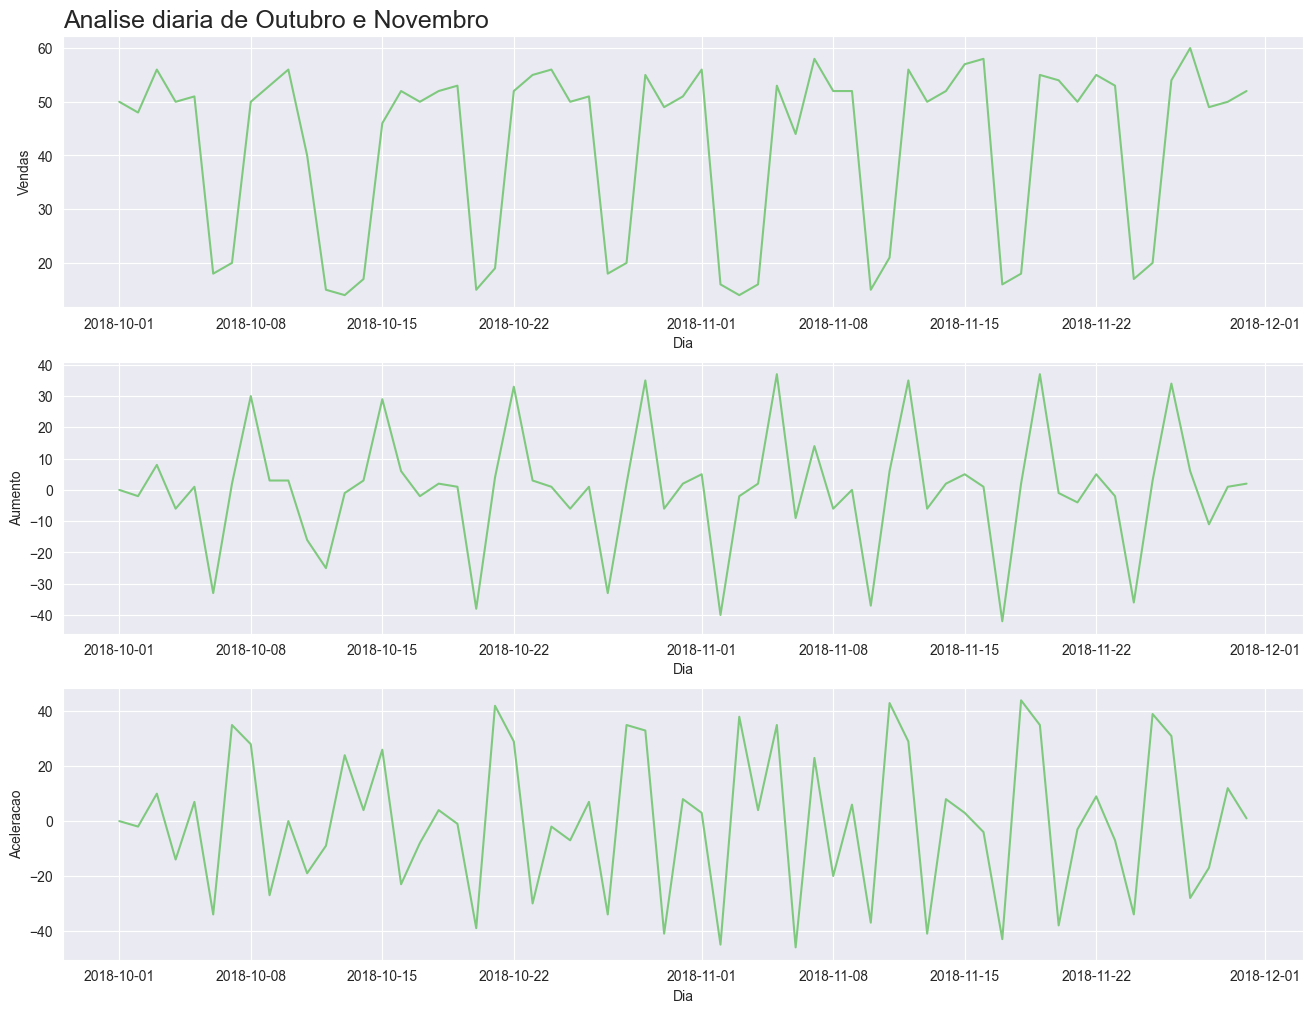

In [41]:
plot_de_comparacao('Analise diaria de Outubro e Novembro', 'Dia',
    'Vendas', 'Aumento', 'Aceleracao', vendas_diarias)

## Analisando a sazanolidade Chocolura Nov e Out

In [42]:
vendas_diarias['Dia_da_semana'] = vendas_diarias.Dia.dt.day_name()

In [43]:
vendas_diarias.head()

,Dia,Vendas,Aumento,Aceleracao,Dia_da_semana
0,2018-10-01,50,0.0,0.0,Monday
1,2018-10-02,48,-2.0,-2.0,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [44]:
vendas_diarias.Dia_da_semana.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [45]:
dia_traduzido ={ 'Monday': 'Segunda', 
    'Tuesday': 'Terça', 
    'Wednesday': 'Quarta', 
    'Thursday': 'Quinta', 
    'Friday': 'Sexta',
    'Saturday': 'Sabado', 
    'Sunday': 'Domingo' }

In [46]:
vendas_diarias.Dia_da_semana = vendas_diarias.Dia_da_semana.map(dia_traduzido)
vendas_diarias.head(7)

,Dia,Vendas,Aumento,Aceleracao,Dia_da_semana
0,2018-10-01,50,0.0,0.0,Segunda
1,2018-10-02,48,-2.0,-2.0,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo


In [47]:
vendas_diarias.head(14)

,Dia,Vendas,Aumento,Aceleracao,Dia_da_semana
0,2018-10-01,50,0.0,0.0,Segunda
1,2018-10-02,48,-2.0,-2.0,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


## Agrupando os dias

In [48]:
vendas_agrupadas = vendas_diarias.groupby('Dia_da_semana')['Vendas', 'Aumento',
    'Aceleracao'].mean().round()
vendas_agrupadas

C:\Users\Marlon\AppData\Local\Temp\ipykernel_8976\4170262397.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_diarias.groupby('Dia_da_semana')['Vendas', 'Aumento',


,Vendas,Aumento,Aceleracao
Dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,30.0,27.0
Sexta,45.0,-7.0,-5.0
Terça,52.0,-1.0,-31.0


## Correlação das Vendas Diarias

In [49]:
def correlacao(titulo, x, y, dataset):
    ax = plt.figure(figsize = (12, 6))
    ax.suptitle(titulo, fontsize = 18, x = x, y = y)
    autocorrelation_plot(dataset)
    ax = ax

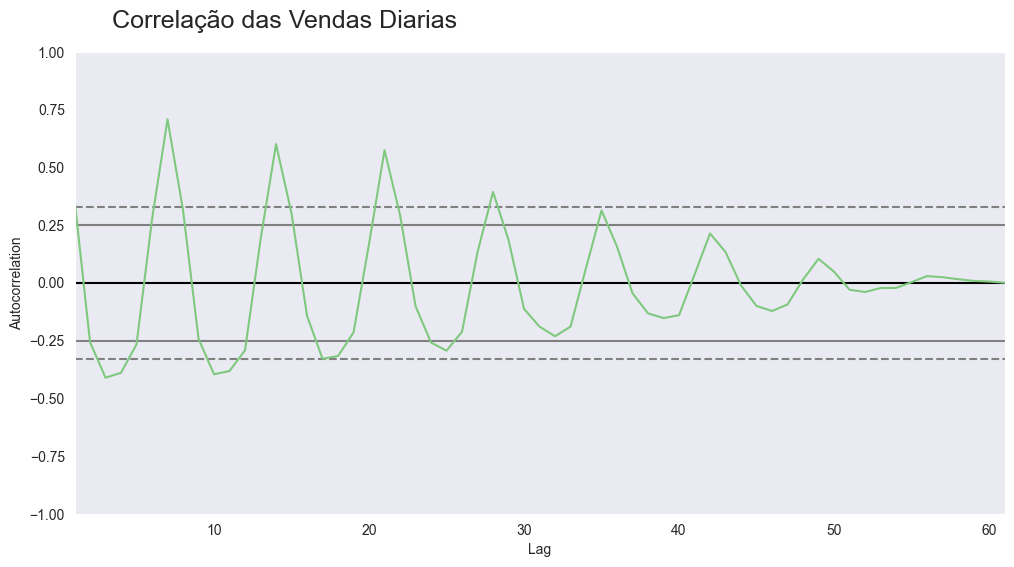

In [50]:
correlacao('Correlação das Vendas Diarias', 0.3, 0.95, vendas_diarias.Vendas)

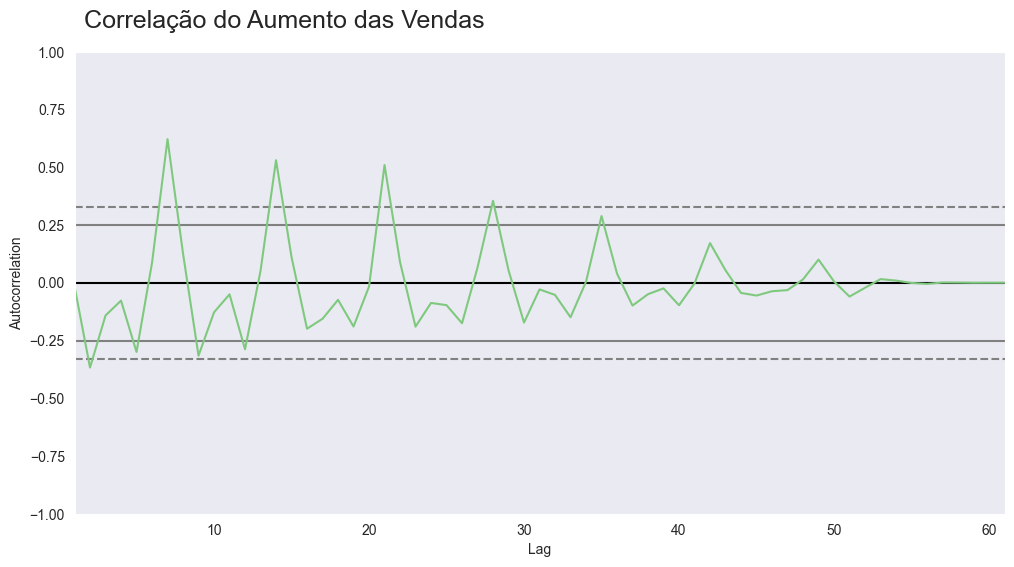

In [51]:
correlacao('Correlação do Aumento das Vendas', 0.30, 0.95, vendas_diarias.Aumento)

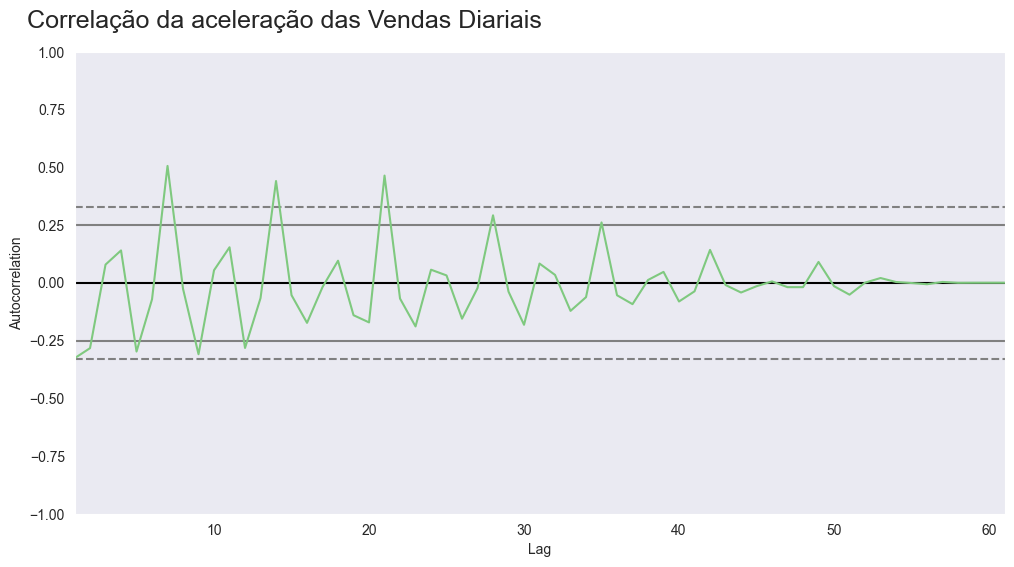

In [52]:
correlacao('Correlação da aceleração das Vendas Diariais', 0.30, 0.95, vendas_diarias.Aceleracao)

## Cafelura --> Alnalise de Vendas

In [53]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.rename(columns = {'mes' : 'Mes', 'vendas' : 'Vendas'}, inplace = True)
cafelura.head()

,Mes,Vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [54]:
cafelura.dtypes

Mes       object
Vendas     int64
dtype: object

In [55]:
cafelura.shape

(24, 2)

In [56]:
cafelura.Mes = pd.to_datetime(cafelura.Mes)
cafelura.dtypes

Mes       datetime64[ns]
Vendas             int64
dtype: object

In [57]:
cafelura.isna().sum().sum()

0

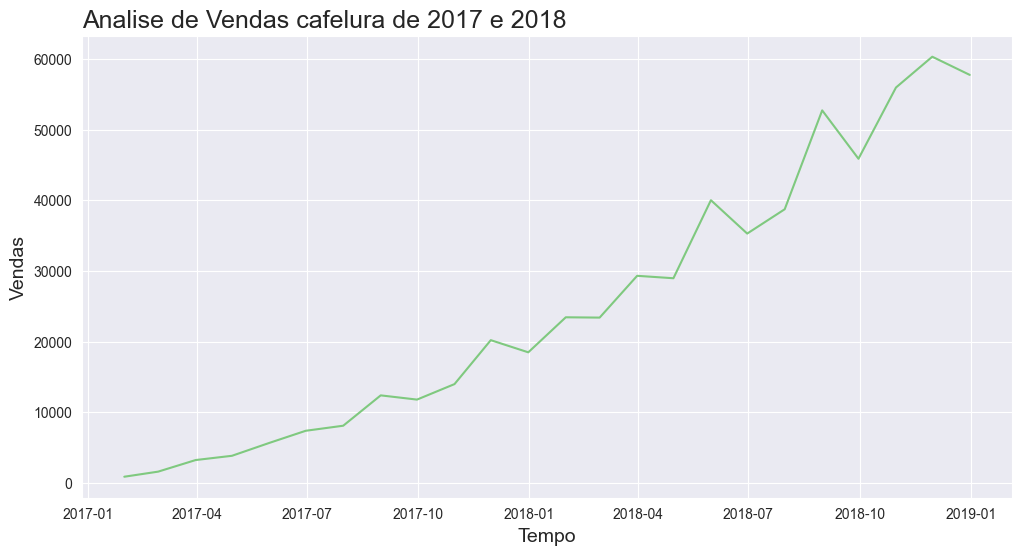

In [58]:
plotar('Analise de Vendas cafelura de 2017 e 2018', 'Tempo', 'Vendas',
    'Mes', 'Vendas', cafelura)

In [59]:
def plot_de_comparacao_2_graficos(titulo, titulo2, x, y1, y2, dataset):
    plt.figure(figsize = (16, 12))
    ax = plt.subplot(2,1,1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    ax = plt.subplot(2,1,2)
    ax.set_title(titulo2, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y2, data = dataset)
    ax = ax

In [60]:
fds_por_mes = pd.read_csv('dias_final_de_semana.csv')
fds_por_mes.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [61]:
fds_por_mes.quantidade_de_dias.values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [62]:
cafelura['Vendas_normalizadas'] = cafelura.Vendas / fds_por_mes.quantidade_de_dias.values
cafelura.head()

,Mes,Vendas,Vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


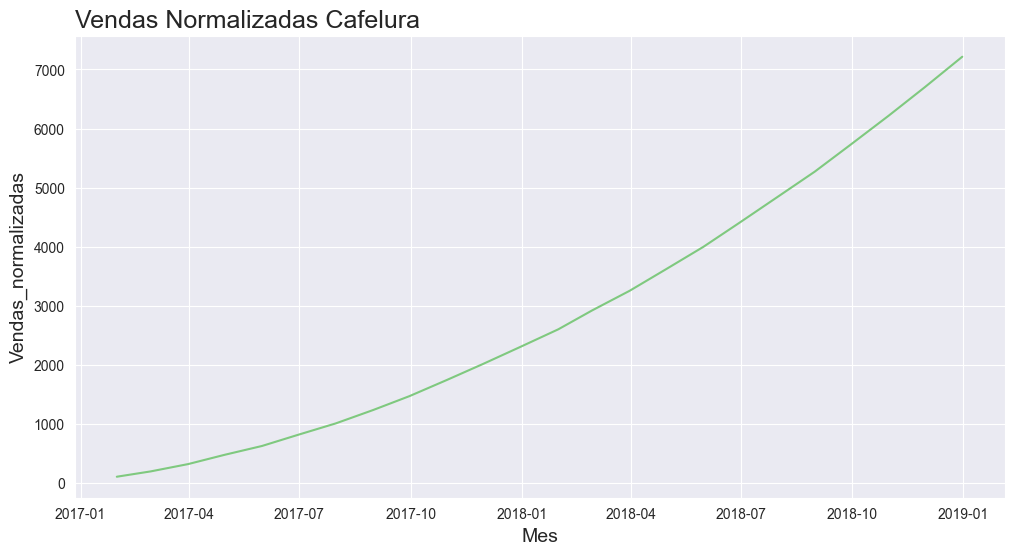

In [63]:
plotar('Vendas Normalizadas Cafelura', 'Mes', 'Vendas_normalizadas', 
    'Mes', 'Vendas_normalizadas', cafelura)

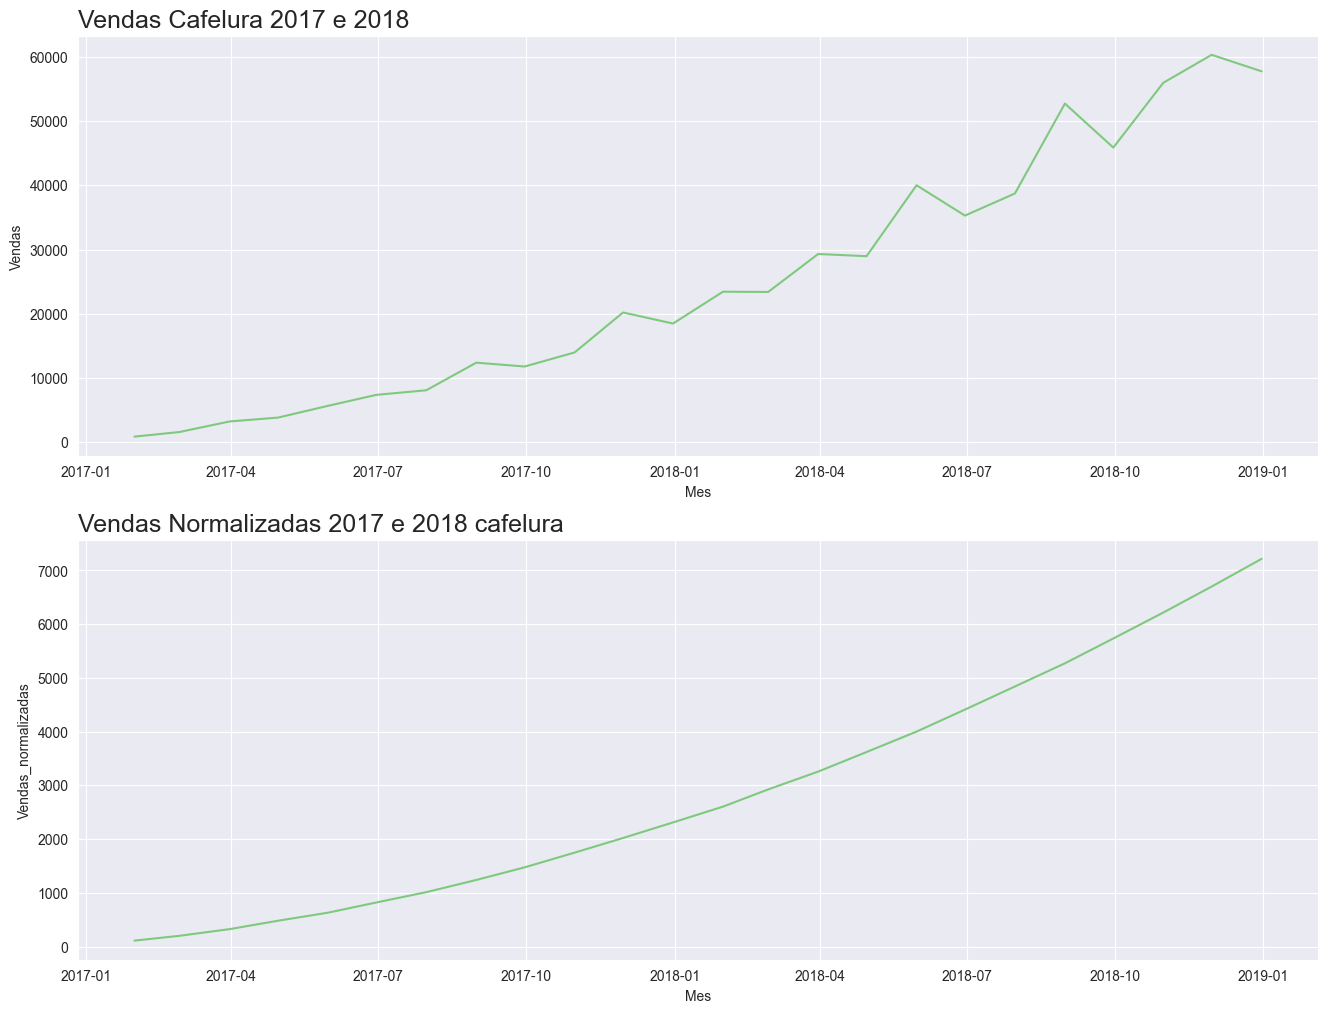

In [64]:
plot_de_comparacao_2_graficos( 'Vendas Cafelura 2017 e 2018', 
    'Vendas Normalizadas 2017 e 2018 cafelura',
    'Mes', 'Vendas', 'Vendas_normalizadas', cafelura)

In [65]:
cafelura['Aumento'] = cafelura.Vendas.diff()
cafelura.Aumento = cafelura.Aumento.fillna(0)
cafelura['Aceleracao'] = cafelura.Aumento.diff()
cafelura.Aceleracao = cafelura.Aceleracao.fillna(0)
cafelura.head()

,Mes,Vendas,Vendas_normalizadas,Aumento,Aceleracao
0,2017-01-31,880,110.0,0.0,0.0
1,2017-02-28,1600,200.0,720.0,720.0
2,2017-03-31,3240,324.0,1640.0,920.0
3,2017-04-30,3840,480.0,600.0,-1040.0
4,2017-05-31,5670,630.0,1830.0,1230.0


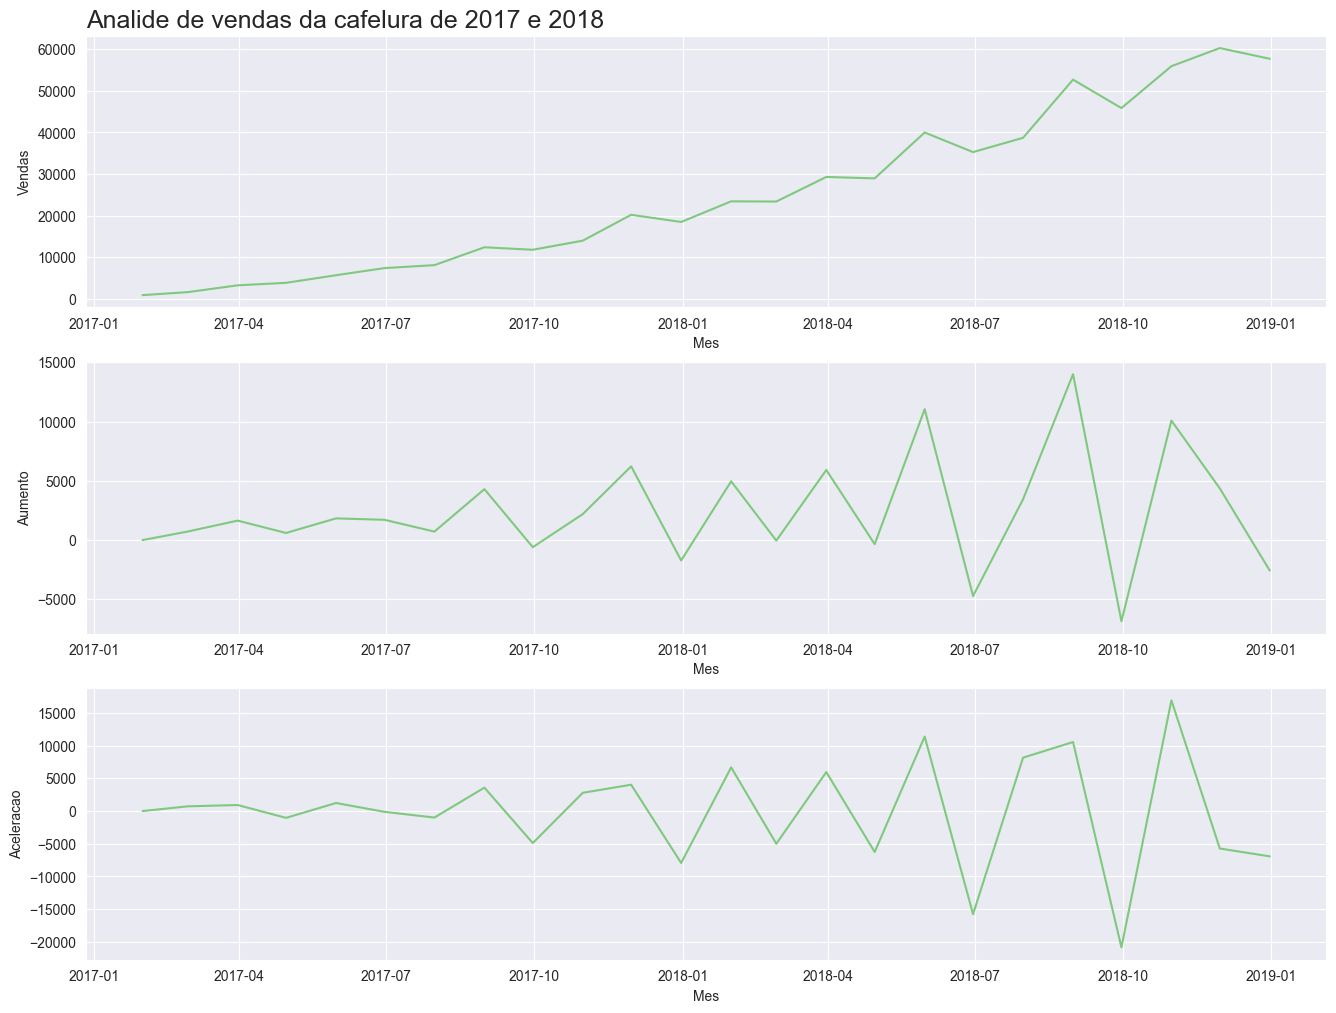

In [66]:
plot_de_comparacao('Analide de vendas da cafelura de 2017 e 2018', 'Mes',
    'Vendas', 'Aumento', 'Aceleracao', cafelura)

## statsmodels

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

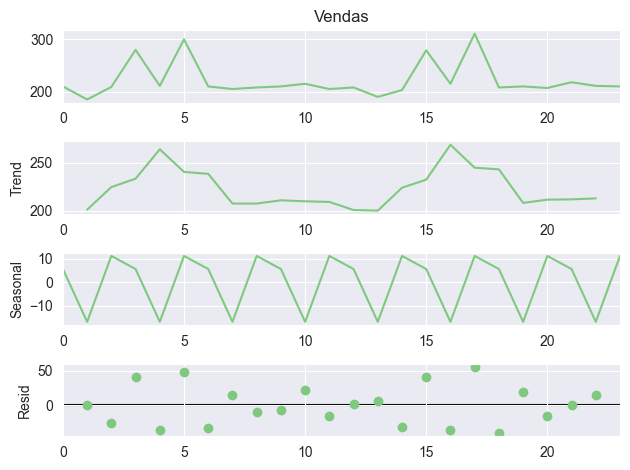

In [68]:
resultado = seasonal_decompose(chocolura.Vendas, period = 3)
ax = resultado.plot()

In [69]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [70]:
data = ({
    'observacao' : observacao,
    'tendencia' : tendencia,
    'sazionalidade' : sazonalidade,
    'ruido' : ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazionalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


In [71]:
def plot_de_comparacao_4_graficos(titulo, x, y1, y2, y3, y4, dataset):
    plt.figure(figsize = (16, 12))
    ax = plt.subplot(4,1,1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    ax = plt.subplot(4,1,2)
    sns.lineplot(x = x, y = y2, data = dataset)
    ax = plt.subplot(4,1,3)
    sns.lineplot(x = x, y = y3, data = dataset)
    ax = plt.subplot(4,1,4)
    sns.lineplot(x = x, y = y4, data = dataset)

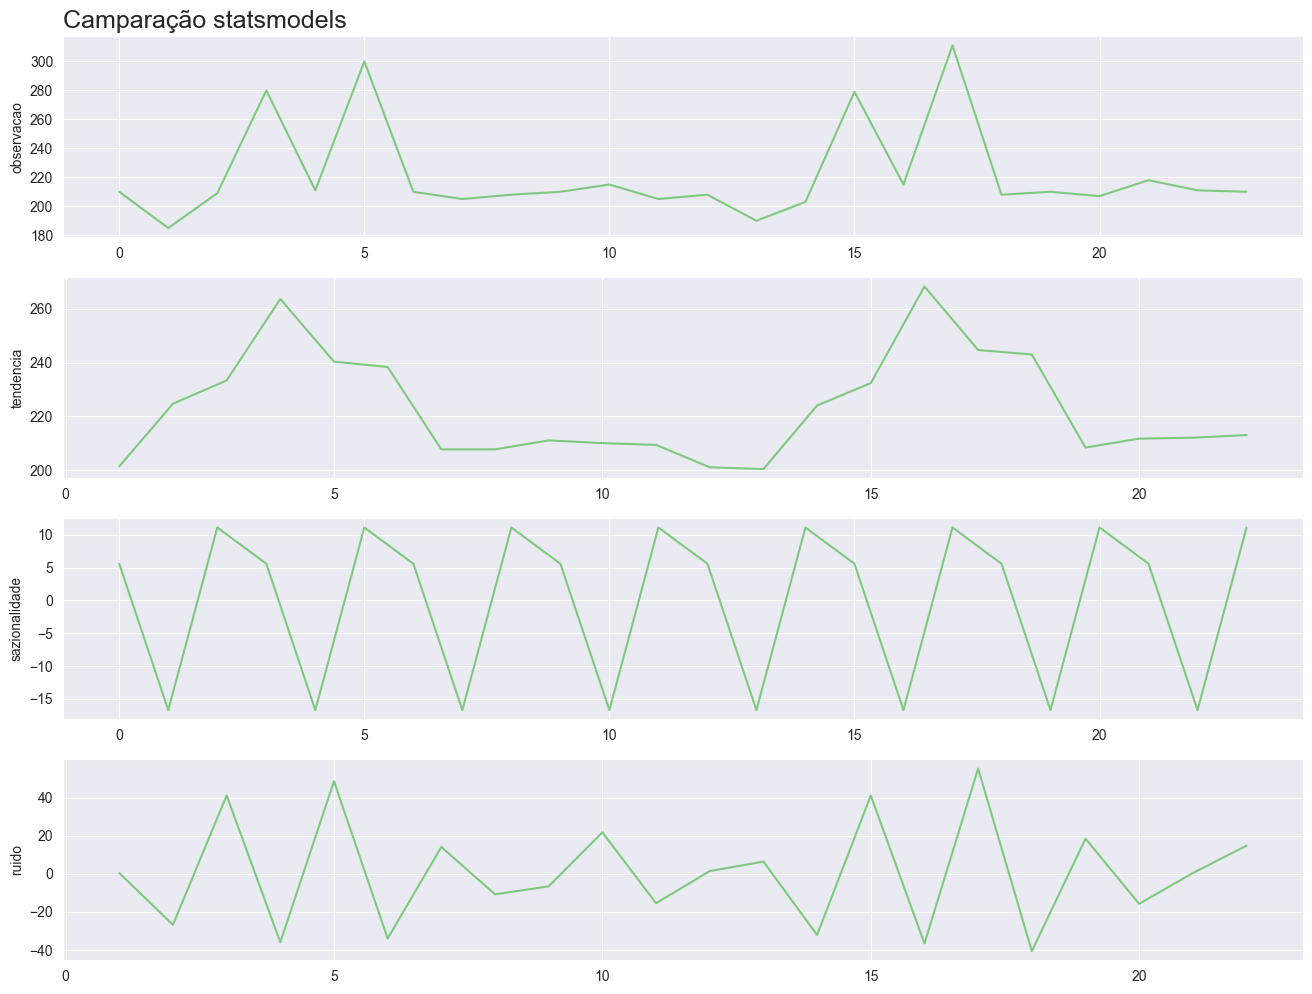

In [72]:
plot_de_comparacao_4_graficos('Camparação statsmodels', resultado.index,
    'observacao', 'tendencia', 'sazionalidade', 'ruido', resultado)

## Alucel --> Anelise de Vendas

In [74]:
alucel = pd.read_csv('alucel.csv')
alucel.rename(columns = {'dia' : 'Dia', 'vendas' : 'Vendas'}, inplace = True)
alucel.head()

,Dia,Vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [75]:
alucel.dtypes


Dia        object
Vendas    float64
dtype: object

In [76]:
alucel.Dia = pd.to_datetime(alucel.Dia)
alucel.dtypes

Dia       datetime64[ns]
Vendas           float64
dtype: object

In [77]:
alucel.shape

(61, 2)

In [79]:
alucel.isna().sum().sum() 

0

In [80]:
alucel['Aumento'] = alucel.Vendas.diff()
alucel.Aumento = alucel.Aumento.fillna(0)
alucel['Aceleracao'] = alucel.Aumento.diff()
alucel.Aceleracao = alucel.Aceleracao.fillna(0)

In [81]:
alucel.head()

,Dia,Vendas,Aumento,Aceleracao
0,2018-10-01,1374.83,0.00,0.00
1,2018-10-02,2185.69,810.86,810.86
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


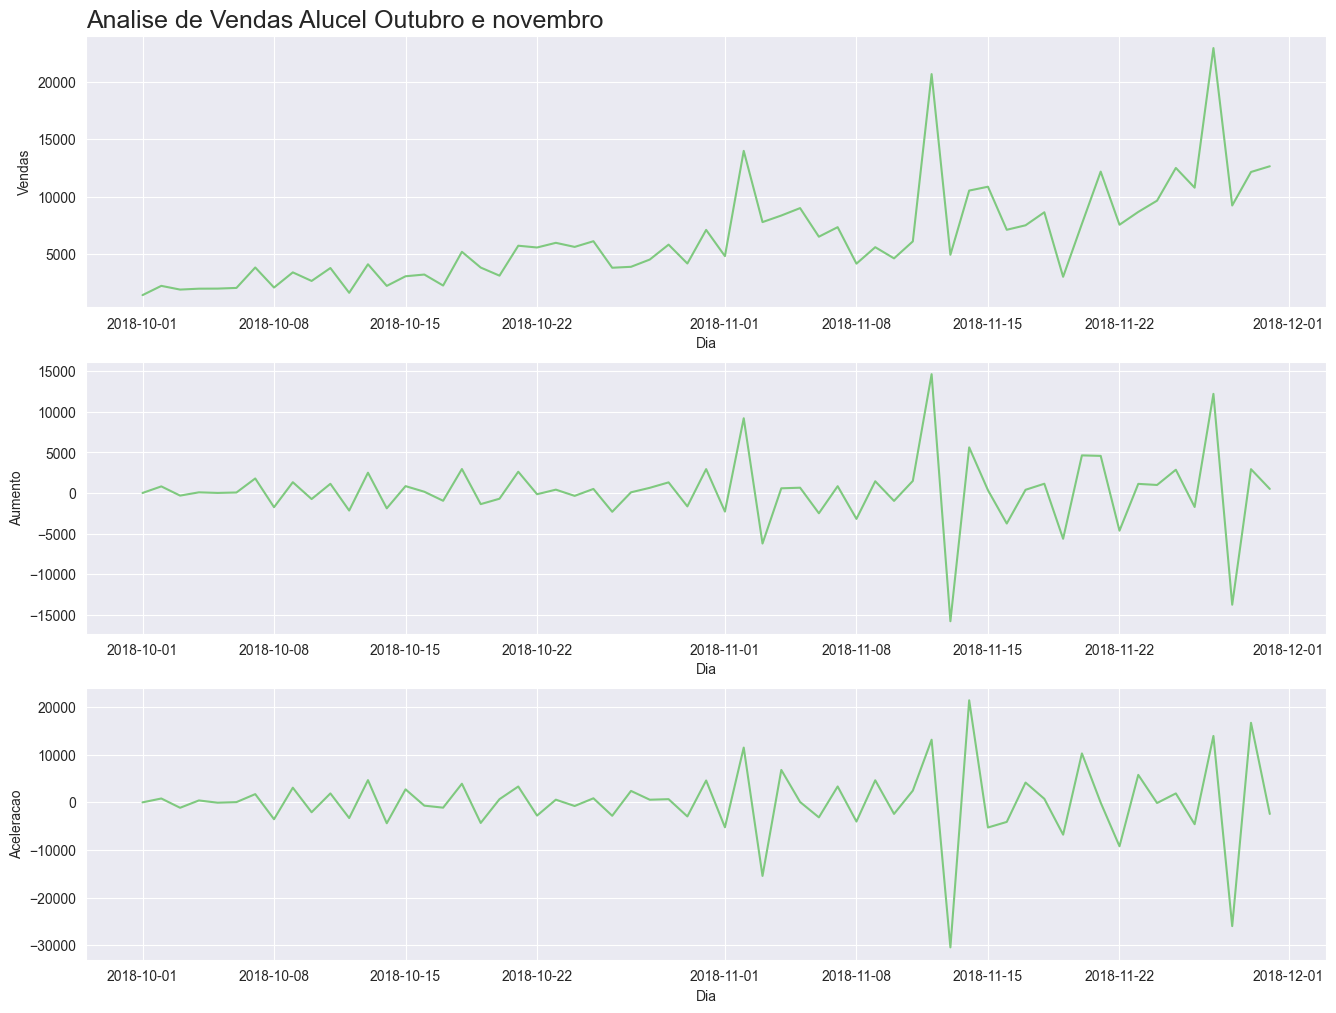

In [82]:
plot_de_comparacao('Analise de Vendas Alucel Outubro e novembro', 'Dia',
    'Vendas', 'Aumento', 'Aceleracao', alucel)

## Alucel --> Media movel

In [83]:
alucel['Media_movel'] = alucel.Vendas.rolling(7).mean()

In [85]:
alucel.head(7)

,Dia,Vendas,Aumento,Aceleracao,Media_movel
0,2018-10-01,1374.83,0.00,0.00,NaN
1,2018-10-02,2185.69,810.86,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


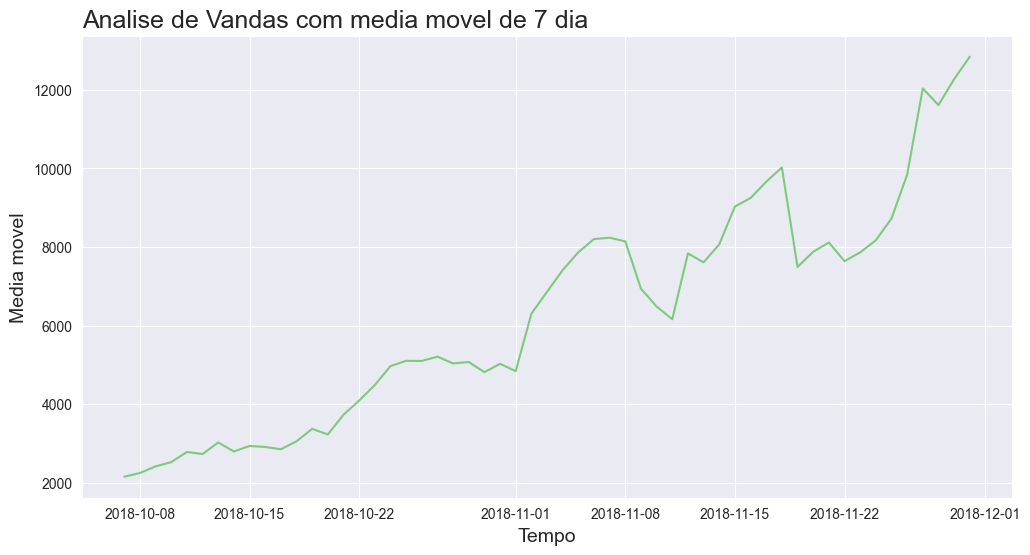

In [86]:
plotar('Analise de Vandas com media movel de 7 dia', 'Tempo',
     'Media movel', 'Dia', 'Media_movel', alucel)

In [87]:
alucel['Media_movel_21'] = alucel.Vendas.rolling(21).mean()

In [88]:
alucel.head(21)

,Dia,Vendas,Aumento,Aceleracao,Media_movel,Media_movel_21
0,2018-10-01,1374.83,0.00,0.00,NaN,NaN
1,2018-10-02,2185.69,810.86,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143,NaN
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857,NaN
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571,NaN


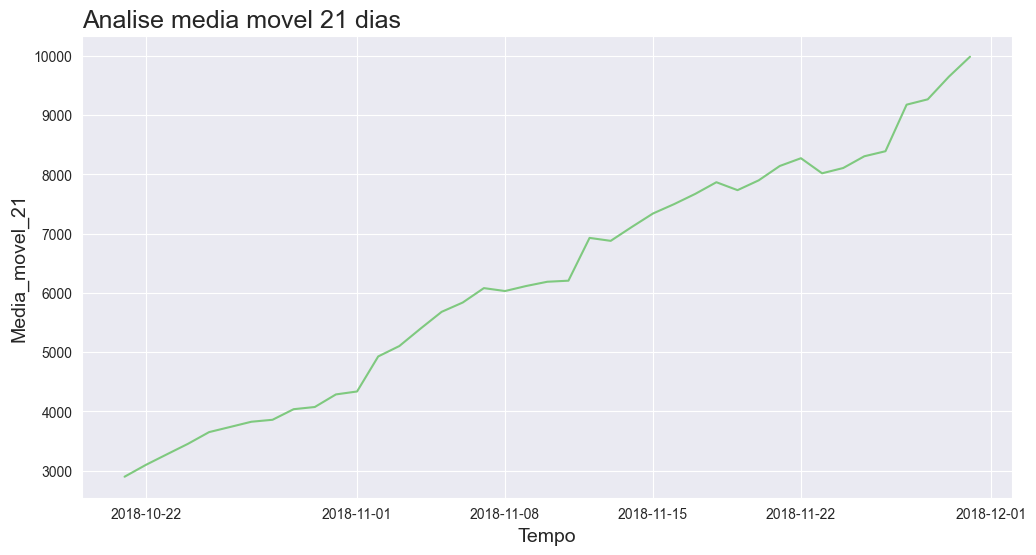

In [89]:
plotar('Analise media movel 21 dias', 'Tempo', 'Media_movel_21', 'Dia',
    'Media_movel_21', alucel)

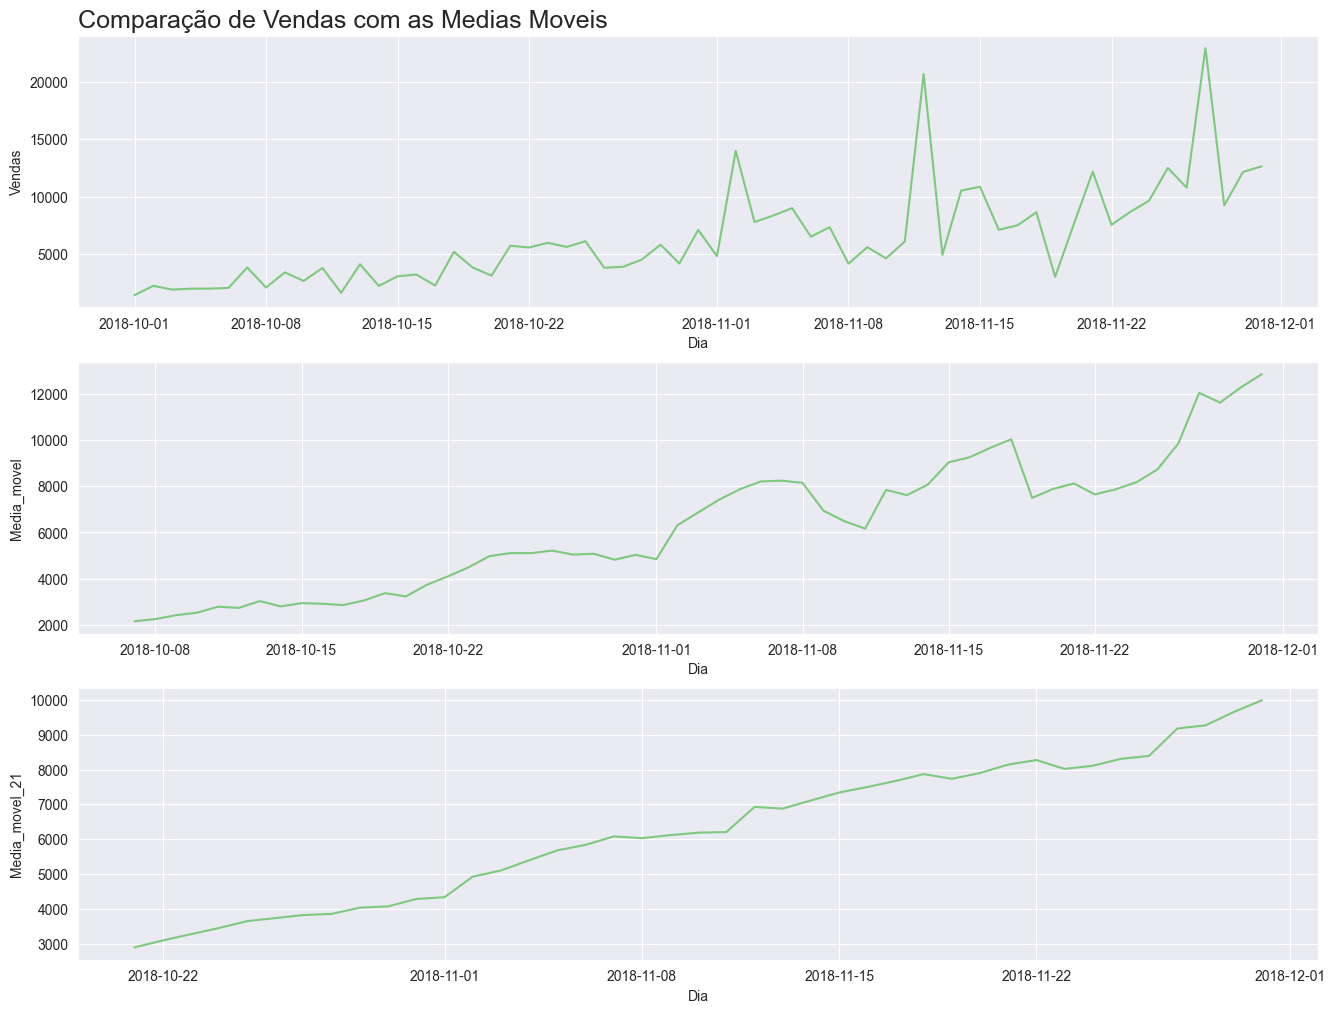

In [90]:
plot_de_comparacao('Comparação de Vendas com as Medias Moveis', 'Dia', 'Vendas',
    'Media_movel', 'Media_movel_21', alucel)